##Project : # Random Forest

**Answer the following questions, download the .ipynb file and submit the file.**
* Name :Manoj Kumar Reddy Mule
* Sesion :13
* CRN :73064


###

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.kaggle.com/datasets/northpatawee/ficoloans/) or just use the csv already provided.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [10]:
df = pd.read_csv('/content/loans.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [11]:
# Get a concise summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer.id        9578 non-null   int64  
 1   credit.policy      9578 non-null   object 
 2   purpose            9578 non-null   object 
 3   int.rate           9578 non-null   float64
 4   installment        9578 non-null   float64
 5   log.annual.inc     9573 non-null   float64
 6   dti                9578 non-null   object 
 7   fico               9578 non-null   int64  
 8   days.with.cr.line  9549 non-null   float64
 9   revol.bal          9577 non-null   float64
 10  revol.util         9516 non-null   object 
 11  inq.last.6mths     9548 non-null   float64
 12  delinq.2yrs        9549 non-null   object 
 13  pub.rec            9549 non-null   object 
 14  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(3), object(6)
memory usage: 1.1+ MB


In [12]:
# Display the first 5 rows of the dataset
df.head()


,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,10001,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0.0,0,0,0
1,10002,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0.0,0,0,0
2,10003,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511.0,25.6,1.0,0,0,0
3,10004,1,debt_consolidation,0.1008,162.34,11.350407,8.1,712,2699.958333,33667.0,73.2,1.0,0,0,0
4,10005,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0.0,1,0,0


In [13]:
# Get summary statistics of the numerical columns
df.describe()


,customer.id,int.rate,installment,log.annual.inc,fico,days.with.cr.line,revol.bal,inq.last.6mths,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9573.000000,9578.000000,9549.000000,9.577000e+03,9548.000000,9578.000000
mean,14789.500000,0.125529,319.089413,10.931892,711.159532,4562.026085,1.691529e+04,1.571743,0.160054
std,2765.074773,0.202225,207.071301,0.614766,42.024737,2497.985733,3.375770e+04,2.198151,0.366676
min,10001.000000,0.060000,15.670000,7.547502,612.000000,178.958333,0.000000e+00,0.000000,0.000000
25%,12395.250000,0.103900,163.770000,10.558414,682.000000,2820.000000,3.187000e+03,0.000000,0.000000
50%,14789.500000,0.122100,268.950000,10.928238,707.000000,4139.958333,8.596000e+03,1.000000,0.000000
75%,17183.750000,0.140700,432.762500,11.289832,737.000000,5730.000000,1.825200e+04,2.000000,0.000000
max,19578.000000,14.700000,940.140000,14.528354,1812.000000,17639.958330,1.207359e+06,33.000000,1.000000


# Exploratory Data Analysis
Do some data visualization

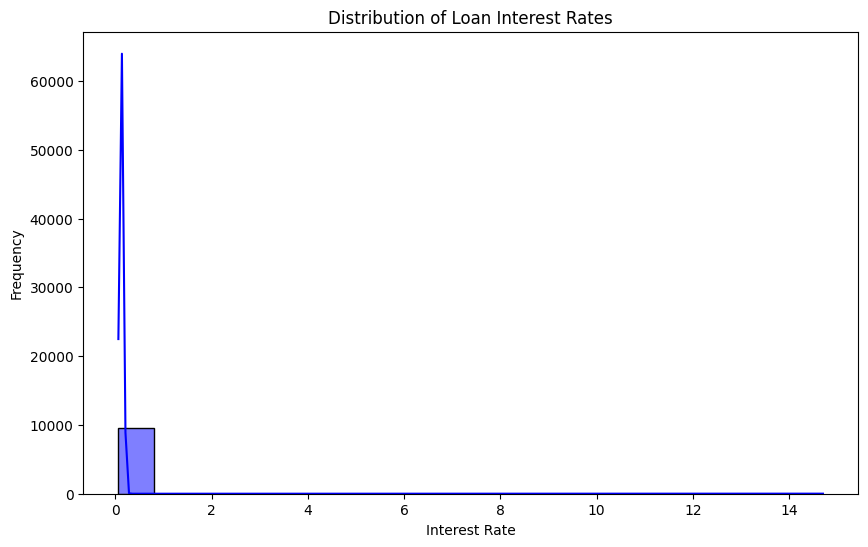

In [14]:
# Plot distribution of the interest rate
plt.figure(figsize=(10, 6))
sns.histplot(df['int.rate'], bins=20, kde=True, color='blue')
plt.title('Distribution of Loan Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()


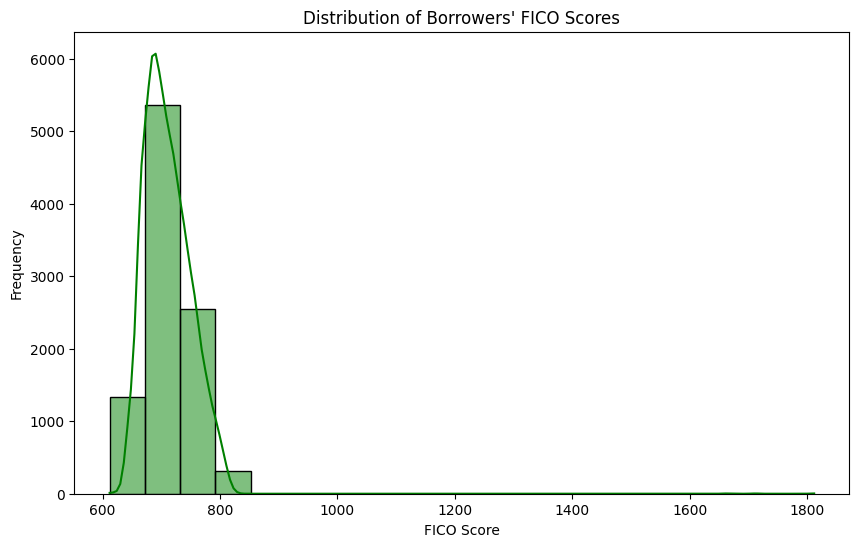

In [15]:
# Plot the distribution of FICO scores
plt.figure(figsize=(10, 6))
sns.histplot(df['fico'], bins=20, kde=True, color='green')
plt.title('Distribution of Borrowers\' FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.show()


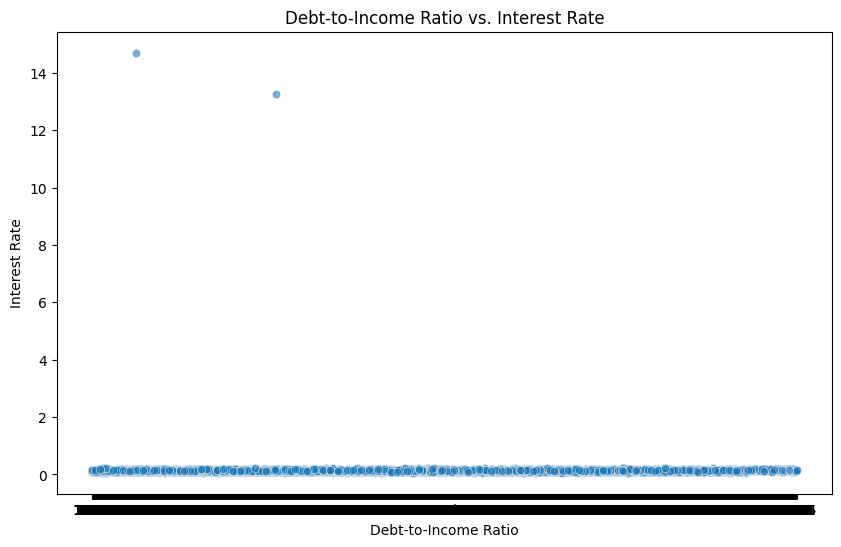

In [16]:
# Plot the relationship between debt-to-income ratio and interest rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dti', y='int.rate', data=df, alpha=0.6)
plt.title('Debt-to-Income Ratio vs. Interest Rate')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Interest Rate')
plt.show()


<ipython-input-17-dd6e7550dcc8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purpose', data=df, palette='Set2')


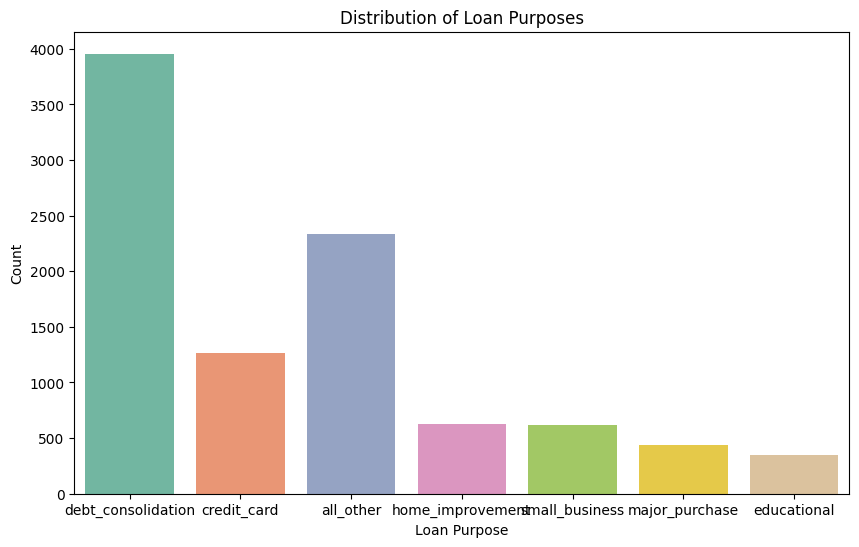

In [17]:
# Plot the distribution of loan purposes
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', data=df, palette='Set2')
plt.title('Distribution of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.show()


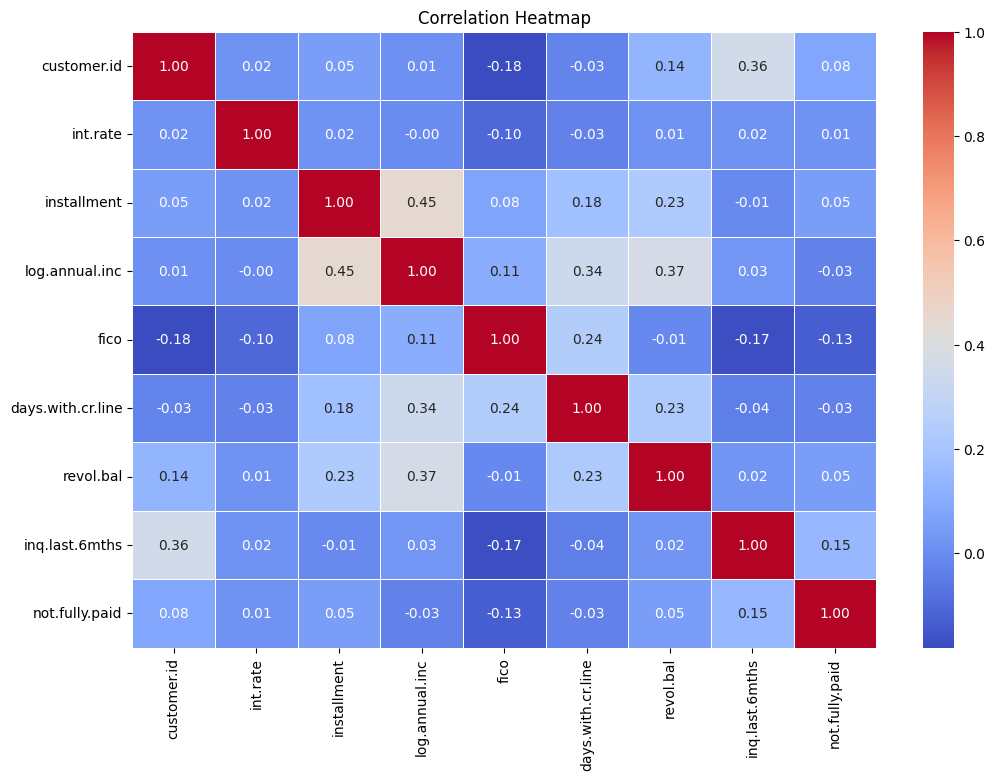

In [18]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
corr = numeric_df.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



<ipython-input-19-969cdb4446e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y='installment', data=df, palette='Set1')


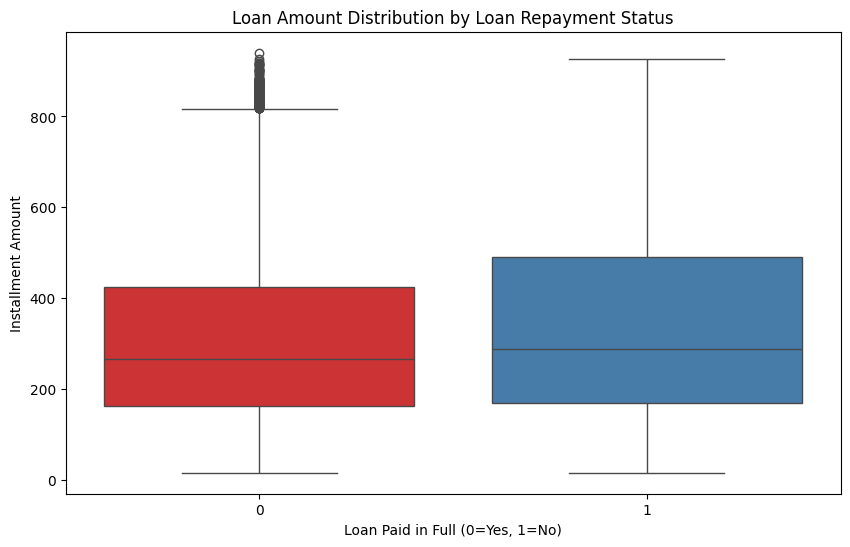

In [19]:
# Boxplot to visualize the distribution of loan amounts by repayment status
plt.figure(figsize=(10, 6))
sns.boxplot(x='not.fully.paid', y='installment', data=df, palette='Set1')
plt.title('Loan Amount Distribution by Loan Repayment Status')
plt.xlabel('Loan Paid in Full (0=Yes, 1=No)')
plt.ylabel('Installment Amount')
plt.show()


<ipython-input-20-0dab34974b0f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='not.fully.paid', data=df, palette='Set2')


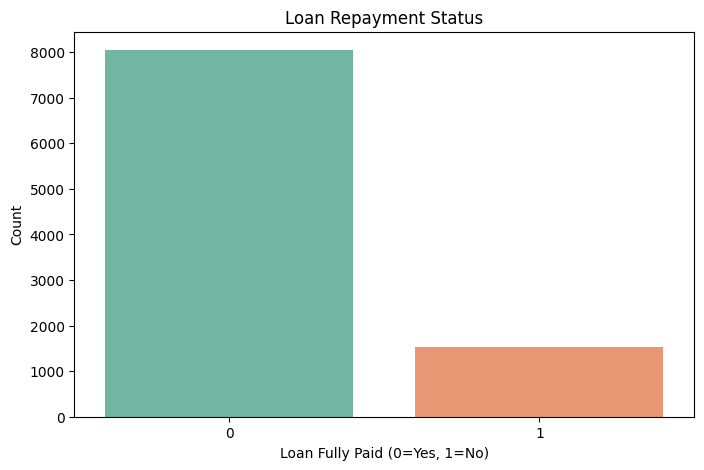

In [20]:
# Plot the count of loans paid back in full vs not paid
plt.figure(figsize=(8, 5))
sns.countplot(x='not.fully.paid', data=df, palette='Set2')
plt.title('Loan Repayment Status')
plt.xlabel('Loan Fully Paid (0=Yes, 1=No)')
plt.ylabel('Count')
plt.show()


**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

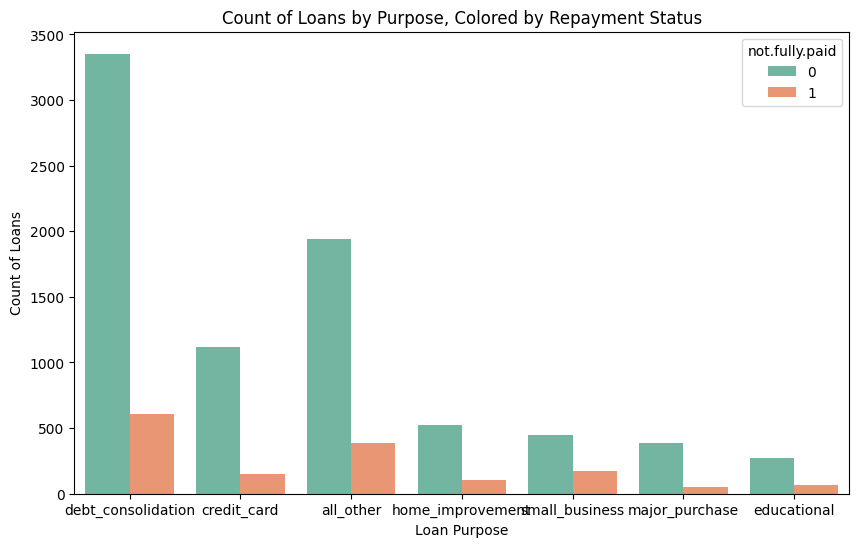

In [21]:

# Create a countplot for the 'purpose' of loans with hue by 'not.fully.paid'
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set2')

# Adding title and labels
plt.title('Count of Loans by Purpose, Colored by Repayment Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count of Loans')

# Show the plot
plt.show()


**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

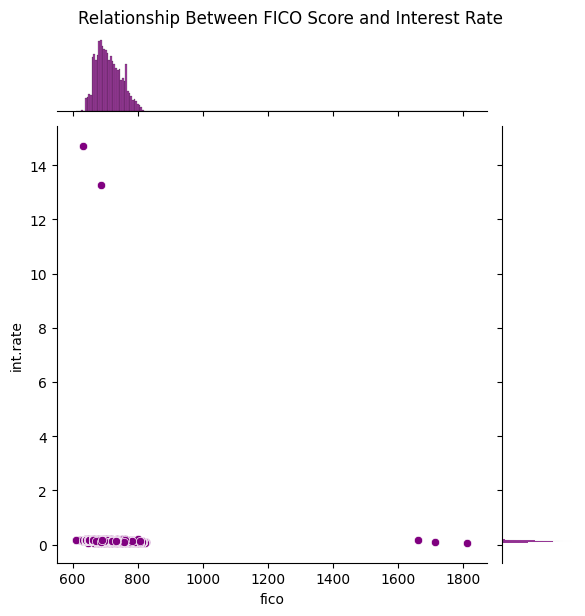

In [22]:
# Create a jointplot for FICO score and Interest Rate
sns.jointplot(x='fico', y='int.rate', data=df, kind='scatter', color='purple')

# Adding title
plt.suptitle('Relationship Between FICO Score and Interest Rate', y=1.02)
plt.show()

**Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

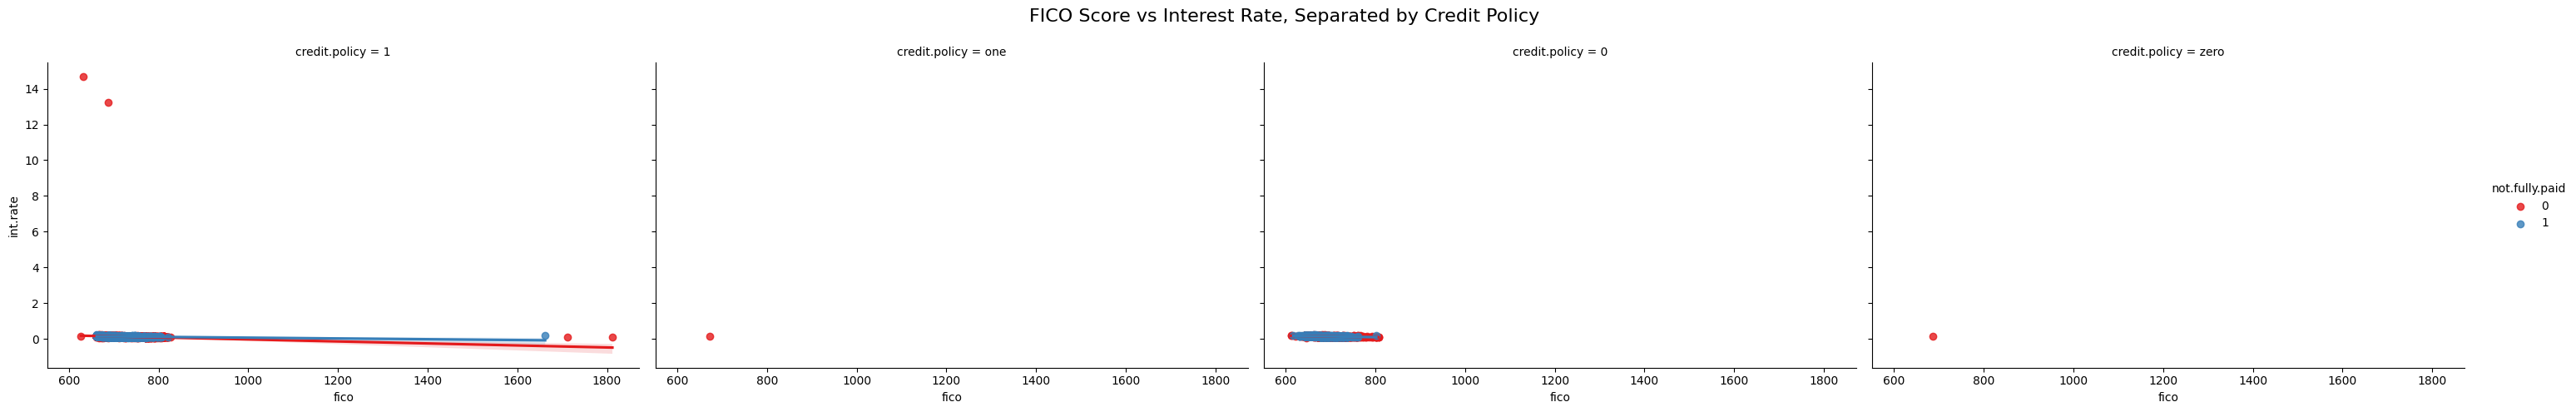

In [23]:
# Create an lmplot to visualize the trend between FICO score and Interest rate
# with separate columns for 'not.fully.paid' and 'credit.policy'
sns.lmplot(x='fico', y='int.rate', data=df, hue='not.fully.paid', col='credit.policy', palette='Set1', aspect=1.5)

# Adding a title to the plot
plt.subplots_adjust(top=0.85)
plt.suptitle('FICO Score vs Interest Rate, Separated by Credit Policy', fontsize=16)

# Show the plot
plt.show()

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer.id        9578 non-null   int64  
 1   credit.policy      9578 non-null   object 
 2   purpose            9578 non-null   object 
 3   int.rate           9578 non-null   float64
 4   installment        9578 non-null   float64
 5   log.annual.inc     9573 non-null   float64
 6   dti                9578 non-null   object 
 7   fico               9578 non-null   int64  
 8   days.with.cr.line  9549 non-null   float64
 9   revol.bal          9577 non-null   float64
 10  revol.util         9516 non-null   object 
 11  inq.last.6mths     9548 non-null   float64
 12  delinq.2yrs        9549 non-null   object 
 13  pub.rec            9549 non-null   object 
 14  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(3), object(6)
memory usage: 1.1+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [25]:
cat_feats = ['purpose']

In [26]:

# Display the list to verify
print(cat_feats)


['purpose']


**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [27]:
df_dummy = pd.get_dummies(df, columns=cat_feats, drop_first=True)

In [28]:

# Display the first few rows to verify the transformation
df_dummy.head()


,customer.id,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,10001,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0.0,0,0,0,False,True,False,False,False,False
1,10002,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0.0,0,0,0,True,False,False,False,False,False
2,10003,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511.0,25.6,1.0,0,0,0,False,True,False,False,False,False
3,10004,1,0.1008,162.34,11.350407,8.1,712,2699.958333,33667.0,73.2,1.0,0,0,0,False,True,False,False,False,False
4,10005,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0.0,1,0,0,True,False,False,False,False,False


## Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [29]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = df.drop('not.fully.paid', axis=1)  # Features: all columns except target
y = df['not.fully.paid']  # Target: 'not.fully.paid' column

# Split the data into training and testing sets (70% training, 30% testing in this case)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Display the shape of the resulting splits to confirm
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (6704, 14)
Testing features shape: (2874, 14)
Training target shape: (6704,)
Testing target shape: (2874,)


## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**

In [30]:
from sklearn.tree import DecisionTreeClassifier
# Check the data types of each column in X_train
print(X_train.dtypes)

# Check for any non-numeric columns or unexpected string values
print(X_train.head())
# Apply pd.get_dummies on all categorical columns if needed
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
# Replace the string 'zero' with 0 and 'one' with 1 (if needed)
X_train = X_train.replace({'zero': 0, 'one': 1, 'two': 2})  # Add other replacements as needed
X_test = X_test.replace({'zero': 0, 'one': 1, 'two': 2})  # Apply same to test data


customer.id            int64
credit.policy         object
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                   object
fico                   int64
days.with.cr.line    float64
revol.bal            float64
revol.util            object
inq.last.6mths       float64
delinq.2yrs           object
pub.rec               object
dtype: object
      customer.id credit.policy             purpose  int.rate  installment  \
4845        14846             1  debt_consolidation    0.1426       548.90   
6910        16911             1           all_other    0.0774       312.19   
8146        18147             0  debt_consolidation    0.1520       208.59   
7113        17114             1           all_other    0.1385       511.56   
195         10196             1         credit_card    0.1059       130.18   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal revol.util  \
4845       10.714418  14.67   682

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
# Step 1: Create an instance of DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=101)

In [33]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier without the 'presort' argument
dtree = DecisionTreeClassifier(
    class_weight=None,
    criterion='gini',          # Use Gini impurity for splitting
    max_depth=None,            # No limit on depth (the tree will grow until all leaves are pure)
    max_features=None,         # Consider all features when splitting
    max_leaf_nodes=None,       # No limit on leaf nodes
    min_samples_leaf=1,        # Minimum samples required at a leaf node
    min_samples_split=2,       # Minimum samples required to split a node
    min_weight_fraction_leaf=0.0,
    random_state=101,          # Reproducibility
    splitter='best'            # Use the best split strategy
)

# Fit the decision tree to the training data
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=101)

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2431
           1       0.25      0.16      0.20       443

    accuracy                           0.80      2874
   macro avg       0.55      0.54      0.54      2874
weighted avg       0.76      0.80      0.78      2874

[[2217  214]
 [ 372   71]]


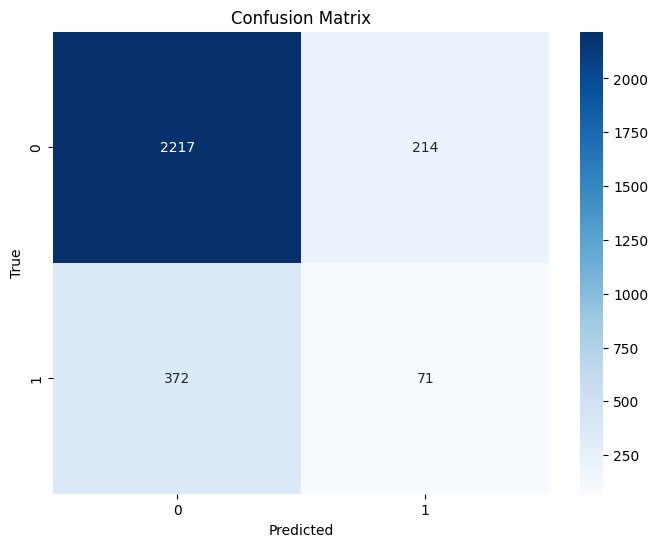

In [35]:
# Ensure that the training and test data have the same columns after one-hot encoding
X_train_dummies = pd.get_dummies(X_train, drop_first=True)
X_test_dummies = pd.get_dummies(X_test, drop_first=True)

# Reindex the test data to match the columns of the training data
X_test_dummies = X_test_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

# Now, train the Decision Tree classifier again on the training data
dtree.fit(X_train_dummies, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test_dummies)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [36]:
print(confusion_matrix(y_test, y_pred))

[[2217  214]
 [ 372   71]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Create an instance of the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=101)

# Step 2: Fit the model to the training data (after one-hot encoding)
rf_classifier.fit(X_train_dummies, y_train)



RandomForestClassifier(random_state=101)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.**

In [46]:
# Step 1: Predict the 'not.fully.paid' class for X_test data
y_pred_rf = rf_classifier.predict(X_test_dummies)

# Step 2: Evaluate the model's performance

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print the Classification Report for 'not.fully.paid' predictions
print("Classification Report for Random Forest (Predicting 'not.fully.paid'):")
print(classification_report(y_test, y_pred_rf))

# Compute the Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)




Classification Report for Random Forest (Predicting 'not.fully.paid'):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.01      0.02       443

    accuracy                           0.85      2874
   macro avg       0.71      0.50      0.47      2874
weighted avg       0.80      0.85      0.78      2874



**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [41]:
from sklearn.metrics import classification_report

# Generate the classification report for the predictions
print("Classification Report for Random Forest (Predicting 'not.fully.paid'):")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest (Predicting 'not.fully.paid'):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.01      0.02       443

    accuracy                           0.85      2874
   macro avg       0.71      0.50      0.47      2874
weighted avg       0.80      0.85      0.78      2874



Confusion Matrix for Random Forest (Predicting 'not.fully.paid'):
[[2428    3]
 [ 439    4]]


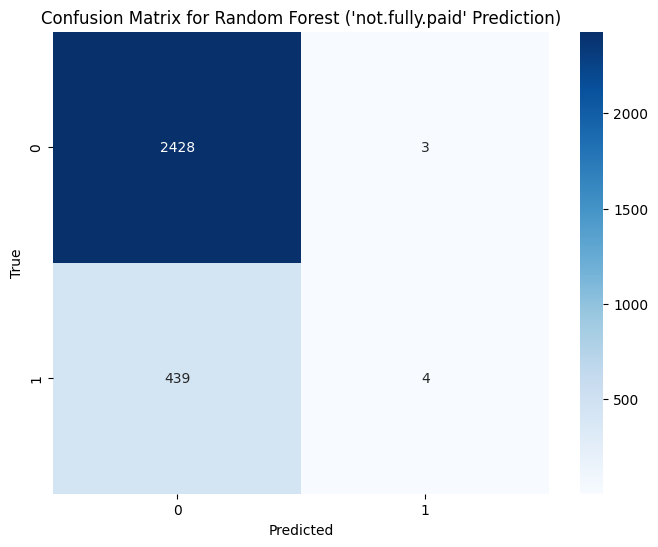

In [47]:
# Print the Confusion Matrix
print("Confusion Matrix for Random Forest (Predicting 'not.fully.paid'):")
print(conf_matrix_rf)

# Plot the Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Random Forest ('not.fully.paid' Prediction)")
plt.show()

**What performed better the random forest or the decision tree?**

Random Forests will often be more accurate than a single decision tree because it mitigates the harm of overfitting effects by aggregating the outputs of several trees: generalization and robustness are often enhanced.

Although a decision tree might end up being drawn too deeply, further causes it to be overfitting, and as such, it may not do very well on some unseen data types compared to Random Forest.

Comparison of such parameters would help you determine the better performing model. Generally, Random Forest will give better performance in almost all cases. But, again, the performance comparison is tied to the characteristics of your dataset.